In [217]:
import pandas as pd
import seaborn as sns

In [218]:
path="/Users/rajasekharreddy/Desktop/MLAssignments/iris.csv"

In [219]:
def read_csv(path):
    df=pd.read_csv(path)
    return df

In [220]:
df= read_csv(path)

In [221]:
# To check if null values are present.
df.isna().sum()

Sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

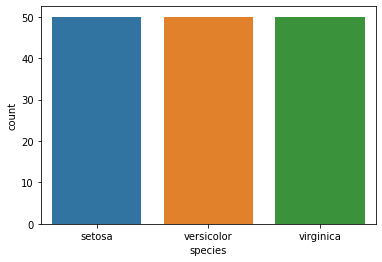

In [222]:
# To check the target species distribution.
sns.countplot(df['species'])

In [223]:
# Extracting the dependent and independent variable.
x= df.iloc[0:,0:4].values
y=df.iloc[0:,4].values

In [224]:
x
y

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

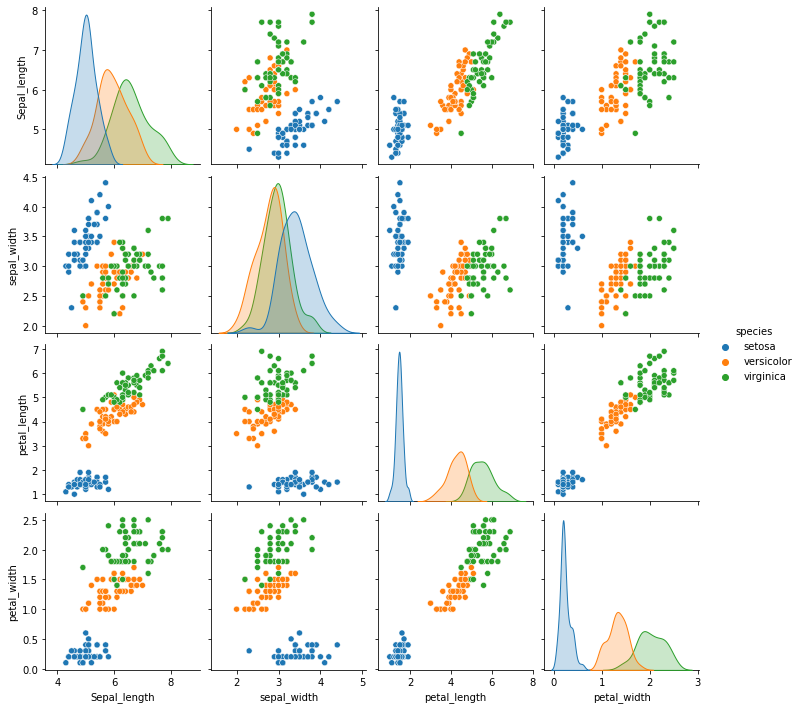

In [225]:
# To understand how the data is distributed using pairplot.
sns.pairplot(df,hue='species')

In [226]:
# Splitting the data as per the test_size = 0.80 for training data and remaining for testing data.
# Random state is a parameter used to control the randomness of a sample. The model will always provide a same results if it has a definite value of random state, and if it has been same training data and same hyperparameters.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=100)

In [227]:
# To display the train data and test data.
print(x_train.shape[0])
print(x_test.shape[0])

120
30


In [228]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# LDA MODEL BUILDING:
# Step 1: Import the Library.
# Step 2: Model Building 
# Step3: Performance Evaluation using various Metrics.

In [229]:
from sklearn import discriminant_analysis

In [230]:
lda_model=discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001)

In [231]:
lda_model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [232]:
print(lda_model)

LinearDiscriminantAnalysis()


In [233]:
y_pred=lda_model.predict(x_test)

In [234]:
#Here we have printed classification report and confusion matrix for the classifier.

In [235]:
from sklearn.metrics import confusion_matrix,classification_report

In [236]:
conf_matrix=confusion_matrix(y_test,y_pred)

In [237]:
print(conf_matrix)

[[11  0  0]
 [ 0  6  0]
 [ 0  1 12]]


In [238]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.86      0.92         7
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [239]:
# Implement cross fold Validation now.
from sklearn.model_selection import cross_val_score
#Predicting the test set result  
y_pred= lda_model.predict(x_test) 
scores = cross_val_score(estimator=lda_model, X=x, y=y, cv=5, n_jobs=-1)
print(scores)

[1.         1.         0.96666667 0.93333333 1.        ]


In [240]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix,classification_report
cm= confusion_matrix(y_test, y_pred)  
cm

array([[11,  0,  0],
       [ 0,  6,  0],
       [ 0,  1, 12]])

# Visualizing the Confusion Matrix using HeatMap

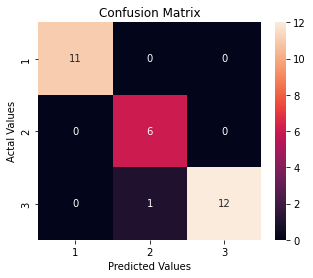

In [241]:
import matplotlib.pyplot as plt
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# How to calculate FN, FP, TN, TP :
FN: The False-negative value for a class will be the sum of values of corresponding rows except for the TP value

FP: The False-positive value for a class will be the sum of values of the corresponding column except for the TP value.

TN: The True Negative value for a class will be the sum of values of all columns and rows except the values of that class that we are calculating the values for.

TP: The True positive value is where the actual value and predicted value are the same.

# For class 1: Confusion Matrix and Accuracy

In [242]:
# So concerning 1 class is: 
# Accuracy for class 1:
true_positive = cm[0][0]
false_negative = cm[0][1] + cm[1][2]
false_positive= cm[1][0] + cm[1][2] 
true_negative = cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]

# Classification Accuracy.
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy of class 1 is:",Accuracy)

# Per class Accuracy (Sensitivity) or (Recall) for class 1
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
print("Per_class_acc_true_pos of class 1 is:",Per_class_acc_true_pos)

# Per class Accuracy for negative value (Specificity) or (Precision) for class 1
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_class_acc_true_neg of class 1 is:",Per_class_acc_true_neg)

# Precison for class 1
Precision = true_positive/(true_positive+false_positive)
print("Precision of class 1 is:",Precision)

# Recall for class 1
Recall = true_positive/(true_positive+false_negative)
print("Recall of class 1 is:",Recall)

# F1 Score for class 1
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score of class 1 is:",F1_Score)

Accuracy of class 1 is: 1.0
Per_class_acc_true_pos of class 1 is: 1.0
Per_class_acc_true_neg of class 1 is: 1.0
Precision of class 1 is: 1.0
Recall of class 1 is: 1.0
F1_Score of class 1 is: 1.0


# For class 2: Confusion Matrix and Accuracy

In [243]:
true_positive = cm[1][1]
false_negative=cm[1][0]+cm[1][2]
false_positive=cm[0][1]+cm[2][1]
true_negative=cm[0][0]+cm[0][2]+cm[2][0]+cm[2][2]
# Classification Accuracy for class 2:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy of class 2 is::",Accuracy)
# Per class Accuracy (Sensitivity) or (Recall) for class 2
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
print("Per_class_acc_true_pos of class 2 is:",Per_class_acc_true_pos)

# Per class Accuracy for negative value (Specificity) or (Precision) for class 2
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_class_acc_true_neg of class 2 is:", Per_class_acc_true_neg)

# Precison for class 2
Precision = true_positive/(true_positive+false_positive)
print("Precision of class 2 is:",Precision) 

# Recall for class 2
Recall = true_positive/(true_positive+false_negative)
print("Recall of class 2 is:", Recall)
# F1 Score for class 2
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score of class 2 is:",F1_Score)


Accuracy of class 2 is:: 0.9666666666666667
Per_class_acc_true_pos of class 2 is: 1.0
Per_class_acc_true_neg of class 2 is: 0.9583333333333334
Precision of class 2 is: 0.8571428571428571
Recall of class 2 is: 1.0
F1_Score of class 2 is: 0.923076923076923


# For class 3: Confusion Matrix and Accuracy:

In [244]:
true_positive = cm[2][2]
false_negative=cm[2][0]+cm[2][1]
false_positive=cm[0][2]+cm[1][2]
true_negative=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]

# Classification Accuracy for class 3:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy of class 3 is:",Accuracy)

# Per class Accuracy (Sensitivity) or (Recall) for class 3
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
print("Per_class_acc_true_pos of class 3 is:",Per_class_acc_true_pos)
# Per class Accuracy for negative value (Specificity) or (Precision) for class 3
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_class_acc_true_neg of class 3 is:",Per_class_acc_true_neg)

# Precison for class 3
Precision = true_positive/(true_positive+false_positive)
print("Precision of class 3 is:",Precision)

# Recall for class 3
Recall = true_positive/(true_positive+false_negative)
print("Recall of class 3 is:",Recall)

# F1 Score for class 3
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score of class 3 is:",F1_Score)


Accuracy of class 3 is: 0.9666666666666667
Per_class_acc_true_pos of class 3 is: 0.9230769230769231
Per_class_acc_true_neg of class 3 is: 1.0
Precision of class 3 is: 1.0
Recall of class 3 is: 0.9230769230769231
F1_Score of class 3 is: 0.9600000000000001


# Implementing AUC and RUC Curve for LDA.

In [245]:
y_pred = pd.DataFrame(y_pred, columns=['species'])
y_test=  pd.DataFrame(y_test, columns=['species'])
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# Replacing the categorical variables to binary variables.
y_pred['species']= y_pred['species'].replace({"setosa":0,"versicolor":1,"virginica":2})
y_test['species']=y_test["species"].replace({"setosa":0,"versicolor":1,"virginica":2})
from sklearn.metrics import roc_auc_score
y_pred=lda_model.predict_proba(x_test)
roc_auc_score(y_test,y_pred,multi_class='ovr')

{0: 1.0, 1: 0.9722222222222223, 2: 0.9819004524886877}


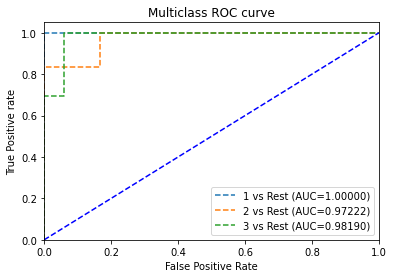

In [251]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
import numpy as np

RF=OneVsRestClassifier(estimator=lda_model)
RF.fit(x_train,y_train)
y_pred =RF.predict(x_test)
pred_prob = RF.predict_proba(x_test)
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# print(y_test, y_test_binarized, pred_prob)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 3
classes = [1,2,3]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.5f)'%(classes[i],roc_auc[i]))
print(roc_auc)

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

# Quadratic Discriminant Analysis:

In [252]:
# Splitting the data as per the test_size = 0.80 for training data and remaining for testing data.
# Random state is a parameter used to control the randomness of a sample. The model will always provide a same results if it has a definite value of random state, and if it has been same training data and same hyperparameters.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=100)

In [253]:
# To display the train data and test data.
print(x_train.shape[0])
print(x_test.shape[0])

120
30


In [254]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [255]:
from sklearn import discriminant_analysis

In [256]:
qda_model=discriminant_analysis.QuadraticDiscriminantAnalysis()

In [257]:
qda_model

QuadraticDiscriminantAnalysis()

In [258]:
qda_model.fit(x_train,y_train)

QuadraticDiscriminantAnalysis()

In [259]:
y_pred=qda_model.predict(x_test)

In [260]:
from sklearn.metrics import confusion_matrix

In [261]:
cm=confusion_matrix(y_pred,y_test)

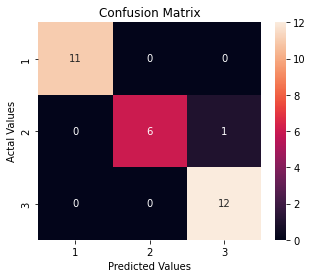

In [262]:
import matplotlib.pyplot as plt
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# For class 1: Confusion Matrix and Accuracy for QDA:

In [263]:
# So concerning 1 class is: 
# Accuracy for class 1:
true_positive = cm[0][0]
false_negative = cm[0][1] + cm[1][2]
false_positive= cm[1][0] + cm[1][2] 
true_negative = cm[1][1]+cm[1][2]+cm[2][1]+cm[2][2]

# Classification Accuracy.
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy of class 1 is:",Accuracy)

# Per class Accuracy (Sensitivity) or (Recall) for class 1
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
print("Per_class_acc_true_pos of class 1 is:",Per_class_acc_true_pos)

# Per class Accuracy for negative value (Specificity) or (Precision) for class 1
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_class_acc_true_neg of class 1 is:",Per_class_acc_true_neg)

# Precison for class 1
Precision = true_positive/(true_positive+false_positive)
print("Precision of class 1 is:",Precision)

# Recall for class 1
Recall = true_positive/(true_positive+false_negative)
print("Recall of class 1 is:",Recall)

# F1 Score for class 1
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score of class 1 is:",F1_Score)

Accuracy of class 1 is: 0.9375
Per_class_acc_true_pos of class 1 is: 0.9166666666666666
Per_class_acc_true_neg of class 1 is: 0.95
Precision of class 1 is: 0.9166666666666666
Recall of class 1 is: 0.9166666666666666
F1_Score of class 1 is: 0.9166666666666666


# For class 2: Confusion Matrix and Accuracy¶

In [264]:
true_positive = cm[1][1]
false_negative=cm[1][0]+cm[1][2]
false_positive=cm[0][1]+cm[2][1]
true_negative=cm[0][0]+cm[0][2]+cm[2][0]+cm[2][2]
# Classification Accuracy for class 2:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy of class 2 is::",Accuracy)
# Per class Accuracy (Sensitivity) or (Recall) for class 2
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
print("Per_class_acc_true_pos of class 2 is:",Per_class_acc_true_pos)

# Per class Accuracy for negative value (Specificity) or (Precision) for class 2
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_class_acc_true_neg of class 2 is:", Per_class_acc_true_neg)

# Precison for class 2
Precision = true_positive/(true_positive+false_positive)
print("Precision of class 2 is:",Precision) 

# Recall for class 2
Recall = true_positive/(true_positive+false_negative)
print("Recall of class 2 is:", Recall)
# F1 Score for class 2
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score of class 2 is:",F1_Score)


Accuracy of class 2 is:: 0.9666666666666667
Per_class_acc_true_pos of class 2 is: 0.8571428571428571
Per_class_acc_true_neg of class 2 is: 1.0
Precision of class 2 is: 1.0
Recall of class 2 is: 0.8571428571428571
F1_Score of class 2 is: 0.923076923076923


# For class 3: Confusion Matrix and Accuracy:

In [265]:
true_positive = cm[2][2]
false_negative=cm[2][0]+cm[2][1]
false_positive=cm[0][2]+cm[1][2]
true_negative=cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]

# Classification Accuracy for class 3:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print("Accuracy of class 3 is:",Accuracy)

# Per class Accuracy (Sensitivity) or (Recall) for class 3
Per_class_acc_true_pos = true_positive / (true_positive+false_negative)
print("Per_class_acc_true_pos of class 3 is:",Per_class_acc_true_pos)
# Per class Accuracy for negative value (Specificity) or (Precision) for class 3
Per_class_acc_true_neg = true_negative/(false_positive+true_negative)
print("Per_class_acc_true_neg of class 3 is:",Per_class_acc_true_neg)

# Precison for class 3
Precision = true_positive/(true_positive+false_positive)
print("Precision of class 3 is:",Precision)

# Recall for class 3
Recall = true_positive/(true_positive+false_negative)
print("Recall of class 3 is:",Recall)

# F1 Score for class 3
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print("F1_Score of class 3 is:",F1_Score)


Accuracy of class 3 is: 0.9666666666666667
Per_class_acc_true_pos of class 3 is: 1.0
Per_class_acc_true_neg of class 3 is: 0.9444444444444444
Precision of class 3 is: 0.9230769230769231
Recall of class 3 is: 1.0
F1_Score of class 3 is: 0.9600000000000001


# Implementing AUC and RUC Curve for QDA

In [266]:
y_pred = pd.DataFrame(y_pred, columns=['species'])
y_test=  pd.DataFrame(y_test, columns=['species'])
y_pred = y_pred.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# Replacing the categorical variables to binary variables.
y_pred['species']= y_pred['species'].replace({"setosa":0,"versicolor":1,"virginica":2})
y_test['species']=y_test["species"].replace({"setosa":0,"versicolor":1,"virginica":2})
from sklearn.metrics import roc_auc_score
y_pred=lda_model.predict_proba(x_test)
roc_auc_score(y_test,y_pred,multi_class='ovr')

1.0

{0: 1.0, 1: 1.0, 2: 1.0}


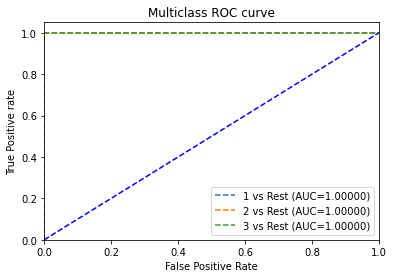

In [268]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve,auc
import numpy as np

RF=OneVsRestClassifier(estimator=qda_model)
RF.fit(x_train,y_train)
y_pred =RF.predict(x_test)
pred_prob = RF.predict_proba(x_test)
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# print(y_test, y_test_binarized, pred_prob)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 3
classes = [1,2,3]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.5f)'%(classes[i],roc_auc[i]))
print(roc_auc)

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()